In [2]:
from IPython.display import HTML, Audio
from base64 import b64decode
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import scipy.fftpack as fft
from scipy.fftpack import dct
from scipy.signal import spectrogram
from scipy.io.wavfile import read as wav_read
import io
import ffmpeg
import librosa
import soundfile as sf   

In [7]:
# Load audio file
No_rain, sample_rate = librosa.load("Audios/No.wav", sr=16000, duration=30)
Low, sample_rate = librosa.load("Audios/Low.wav", sr=16000, duration=30)
Medium, sample_rate = librosa.load("Audios/Medium.wav", sr=16000, duration=30)
High, sample_rate = librosa.load("Audios/High.wav", sr=16000, duration=30)

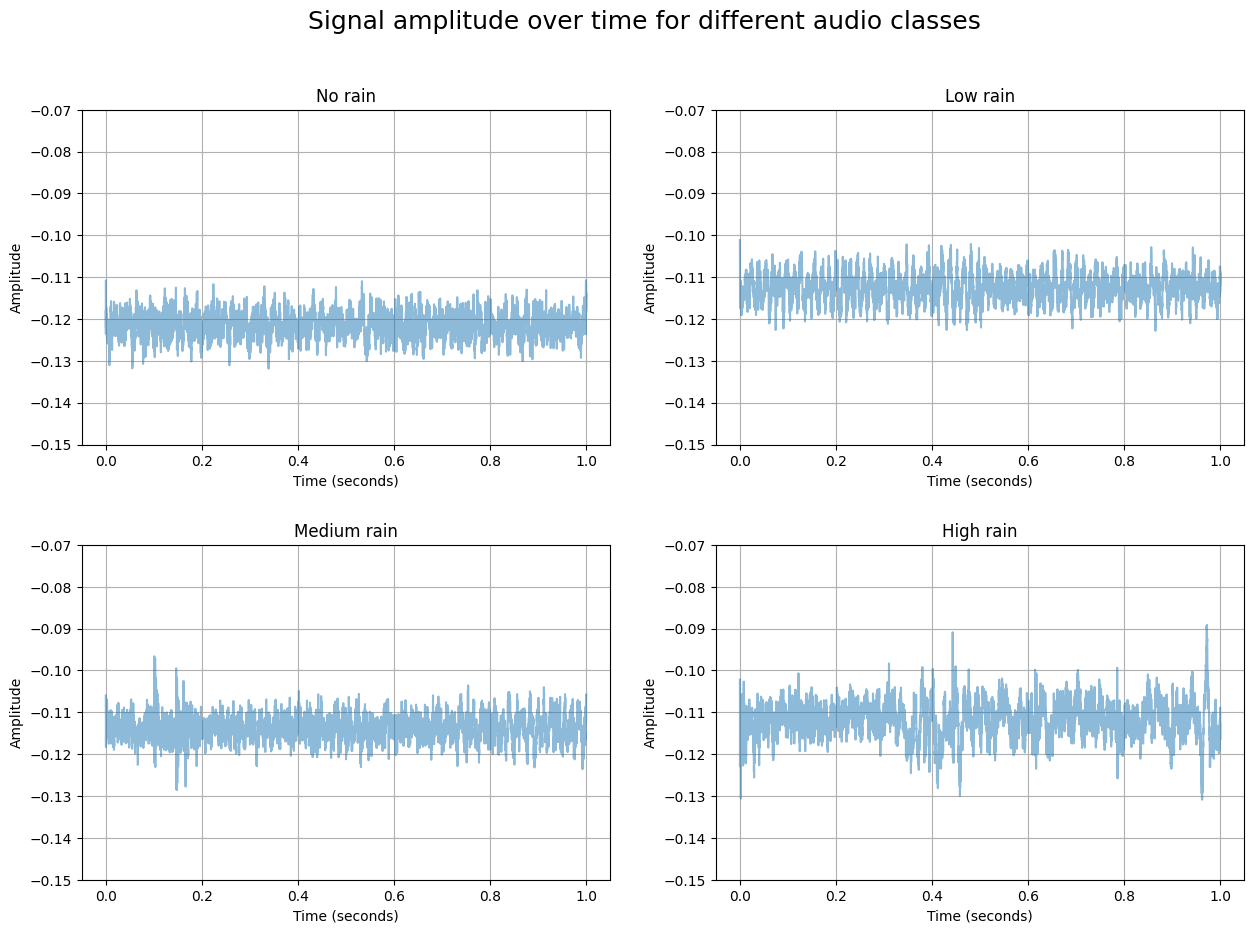

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
fig.suptitle('Signal amplitude over time for different audio classes', fontsize=18)

axs[0, 0].set_title('No rain')
time_axis = [i / sample_rate for i in range(len(No_rain))]
axs[0, 0].plot(time_axis, No_rain, alpha=0.5, label='audio')

axs[0, 1].set_title('Low rain')
time_axis = [i / sample_rate for i in range(len(Low))]
axs[0, 1].plot(time_axis, Low, alpha=0.5, label='audio')

axs[1, 0].set_title('Medium rain')
time_axis = [i / sample_rate for i in range(len(Medium))]
axs[1, 0].plot(time_axis, Medium, alpha=0.5, label='audio')

axs[1, 1].set_title('High rain')
time_axis = [i / sample_rate for i in range(len(High))]
axs[1, 1].plot(time_axis, High, alpha=0.5, label='audio')

for ax in axs.flat:
    ax.set(xlabel='Time (seconds)', ylabel='Amplitude')
    ax.grid(True)

ymin = -0.15
ymax = -0.07
for ax in axs.ravel():
    ax.set_ylim([ymin, ymax])


plt.show()

def plot_time(audio, sample_rate, figsize=(5,3), title=''):
    plt.figure(figsize=figsize)
    time_axis = [i / sample_rate for i in range(len(audio))]
    plt.plot(time_axis, audio, alpha=0.5, label='audio')
    plt.grid(True)
    plt.title(title + ' Sample - Time Domain')
    plt.xlabel('time (seconds)')
    plt.ylabel('amplitude')
    plt.show()

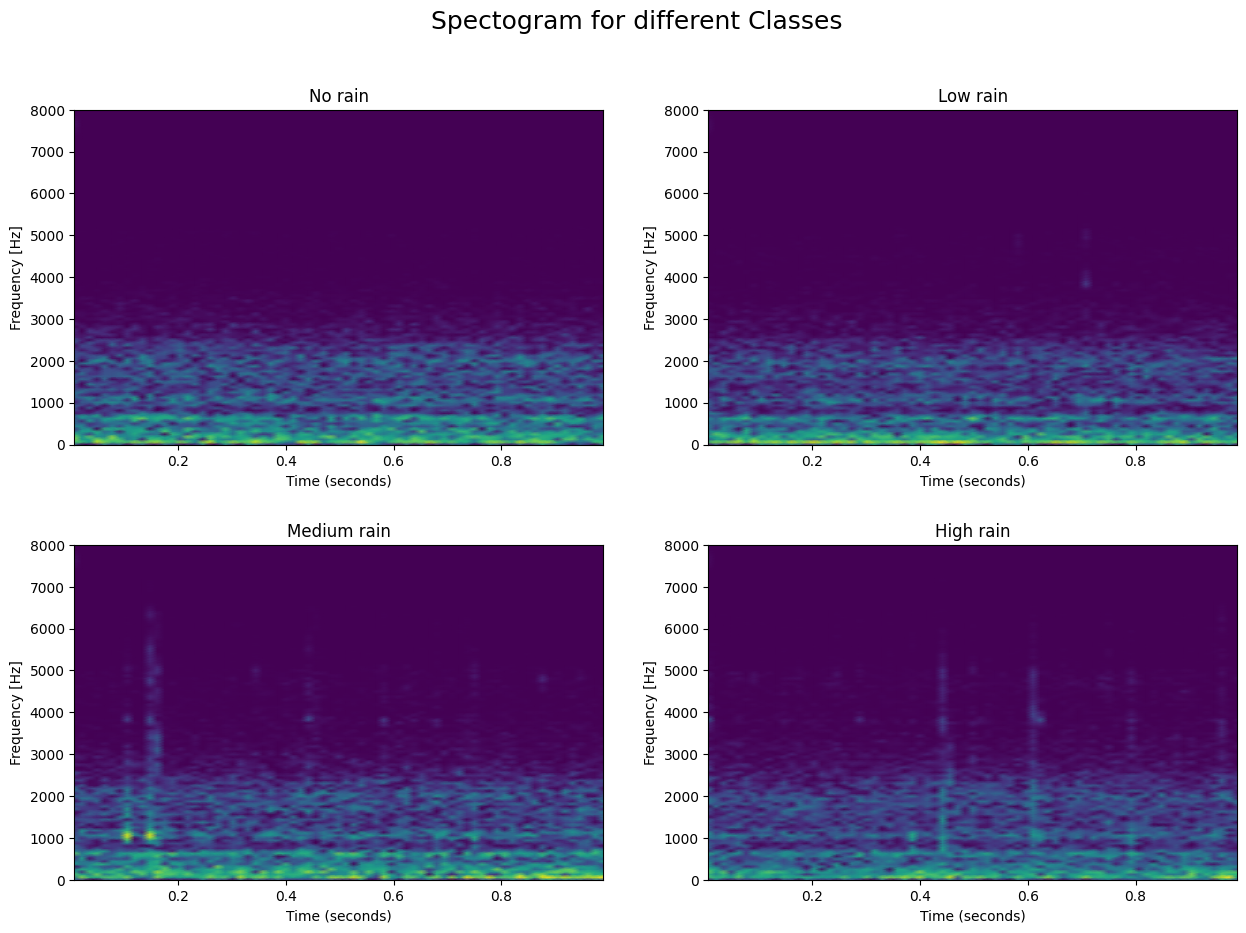

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
fig.suptitle('Spectogram over time for different audio classes', fontsize=18)

epsilon = 1e-10

axs[0, 0].set_title('No rain')
frequencies, times, Sxx = spectrogram(No_rain, sample_rate)
axs[0, 0].pcolormesh(times, frequencies, 10 * np.log10(Sxx + epsilon), shading='gouraud')

axs[0, 1].set_title('Low rain')
frequencies, times, Sxx = spectrogram(Low, sample_rate)
axs[0, 1].pcolormesh(times, frequencies, 10 * np.log10(Sxx + epsilon), shading='gouraud')

axs[1, 0].set_title('Medium rain')
frequencies, times, Sxx = spectrogram(Medium, sample_rate)
axs[1, 0].pcolormesh(times, frequencies, 10 * np.log10(Sxx + epsilon), shading='gouraud')

axs[1, 1].set_title('High rain')
frequencies, times, Sxx = spectrogram(High, sample_rate)
axs[1, 1].pcolormesh(times, frequencies, 10 * np.log10(Sxx + epsilon), shading='gouraud')

for ax in axs.flat:
    ax.set(xlabel='Time (seconds)', ylabel='Frequency [Hz]')

plt.show()